In [1]:
import trimesh
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
output_folder = "outputs_norm"           # where normalized meshes will be saved
os.makedirs(output_folder, exist_ok=True)

In [19]:
# Step 1: Paths and Parameters
mesh_folder = "8samples"               # original meshes
output_folder = "outputs_task2"        # all results stored here
os.makedirs(output_folder, exist_ok=True)

In [20]:
bins = 1024 

In [21]:
# Step 2: Get list of meshes
mesh_files = [f for f in os.listdir(mesh_folder) if f.endswith(".obj")]
print("Found meshes:", mesh_files)


Found meshes: ['branch.obj', 'cylinder.obj', 'explosive.obj', 'fence.obj', 'girl.obj', 'person.obj', 'table.obj', 'talwar.obj']


In [22]:
# Step 3: Normalize and Quantize
for mesh_file in mesh_files:
    print(f"\nProcessing mesh: {mesh_file}")
    mesh_path = os.path.join(mesh_folder, mesh_file)

    # Load mesh (ignore textures/materials)
    mesh = trimesh.load_mesh(mesh_path, skip_materials=True, process=False)
    vertices = np.array(mesh.vertices)

    # Min–Max Normalization
    v_min = vertices.min(axis=0)
    v_max = vertices.max(axis=0)
    norm_minmax = (vertices - v_min) / (v_max - v_min)   # [0, 1] range

    # Save normalized mesh
    mesh_minmax = mesh.copy()
    mesh_minmax.vertices = norm_minmax
    out_minmax = os.path.join(output_folder, f"{mesh_file[:-4]}_norm_minmax.obj")
    mesh_minmax.export(out_minmax)
    print(f" Saved Min–Max normalized mesh → {out_minmax}")

    # Quantize Min–Max normalized data
    quant_minmax = np.floor(norm_minmax * (bins - 1)).astype(int)
    mesh_q_minmax = mesh.copy()
    mesh_q_minmax.vertices = quant_minmax
    out_q_minmax = os.path.join(output_folder, f"{mesh_file[:-4]}_quant_minmax.obj")
    mesh_q_minmax.export(out_q_minmax)
    print(f" Saved Min–Max quantized mesh → {out_q_minmax}")

    # Unit-Sphere Normalization
    center = vertices.mean(axis=0)
    v_centered = vertices - center
    radius = np.max(np.linalg.norm(v_centered, axis=1))
    norm_sphere = v_centered / radius                     # inside sphere radius = 1

    # Save normalized mesh
    mesh_sphere = mesh.copy()
    mesh_sphere.vertices = norm_sphere
    out_sphere = os.path.join(output_folder, f"{mesh_file[:-4]}_norm_sphere.obj")
    mesh_sphere.export(out_sphere)
    print(f" Saved Unit-Sphere normalized mesh → {out_sphere}")

    # Quantize Unit-Sphere normalized data
    norm_sphere_01 = (norm_sphere + 1) / 2                # map [-1,1] → [0,1]
    quant_sphere = np.floor(norm_sphere_01 * (bins - 1)).astype(int)
    mesh_q_sphere = mesh.copy()
    mesh_q_sphere.vertices = quant_sphere
    out_q_sphere = os.path.join(output_folder, f"{mesh_file[:-4]}_quant_sphere.obj")
    mesh_q_sphere.export(out_q_sphere)
    print(f"Saved Unit-Sphere quantized mesh → {out_q_sphere}")

print("\n All meshes processed! Check the 'outputs_task2' folder.")



Processing mesh: branch.obj
 Saved Min–Max normalized mesh → outputs_task2\branch_norm_minmax.obj
 Saved Min–Max quantized mesh → outputs_task2\branch_quant_minmax.obj
 Saved Unit-Sphere normalized mesh → outputs_task2\branch_norm_sphere.obj
Saved Unit-Sphere quantized mesh → outputs_task2\branch_quant_sphere.obj

Processing mesh: cylinder.obj
 Saved Min–Max normalized mesh → outputs_task2\cylinder_norm_minmax.obj
 Saved Min–Max quantized mesh → outputs_task2\cylinder_quant_minmax.obj
 Saved Unit-Sphere normalized mesh → outputs_task2\cylinder_norm_sphere.obj
Saved Unit-Sphere quantized mesh → outputs_task2\cylinder_quant_sphere.obj

Processing mesh: explosive.obj
 Saved Min–Max normalized mesh → outputs_task2\explosive_norm_minmax.obj
 Saved Min–Max quantized mesh → outputs_task2\explosive_quant_minmax.obj
 Saved Unit-Sphere normalized mesh → outputs_task2\explosive_norm_sphere.obj
Saved Unit-Sphere quantized mesh → outputs_task2\explosive_quant_sphere.obj

Processing mesh: fence.obj

In [24]:
orig_folder = "8samples"             # original meshes
processed_folder = "outputs_task2"   # contains quantized meshes
output_folder = "outputs_task3"      # reconstructed meshes + plots
os.makedirs(output_folder, exist_ok=True)

In [25]:
# Step 2: Error metrics
def mean_squared_error(a, b):
    return np.mean((a - b) ** 2)

def mean_absolute_error(a, b):
    return np.mean(np.abs(a - b))


Processing mesh: branch.obj
 Min–Max → MSE: 0.00000078, MAE: 0.00073400


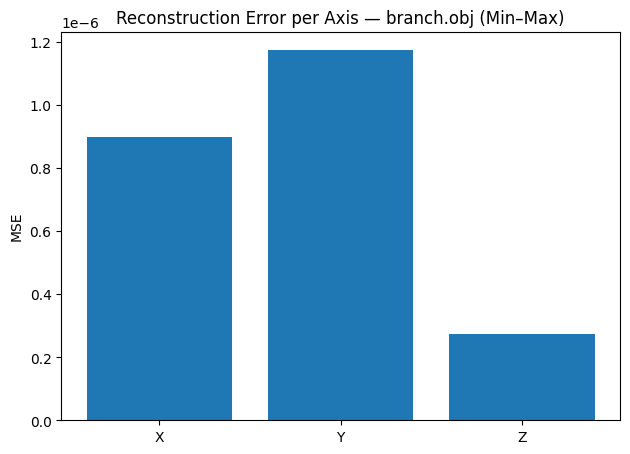

Unit-Sphere → MSE: 0.00000234, MAE: 0.00132481


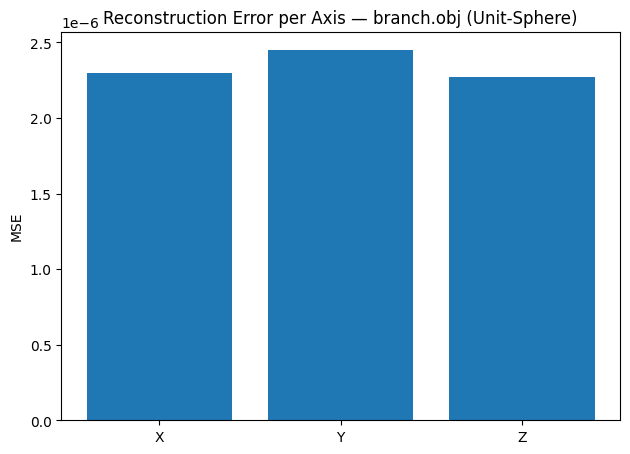


Processing mesh: cylinder.obj
 Min–Max → MSE: 0.00000080, MAE: 0.00061095


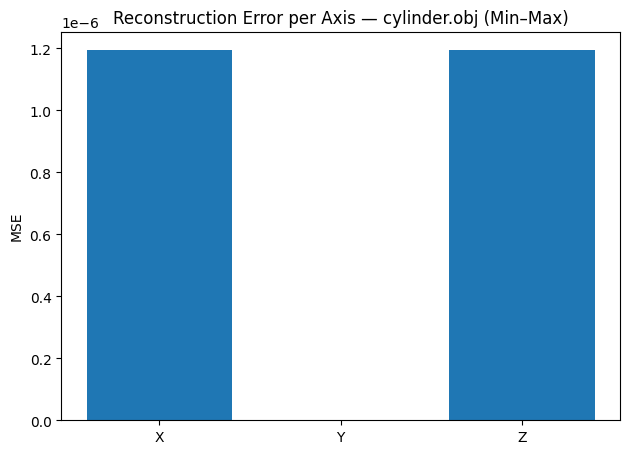

Unit-Sphere → MSE: 0.00000257, MAE: 0.00138242


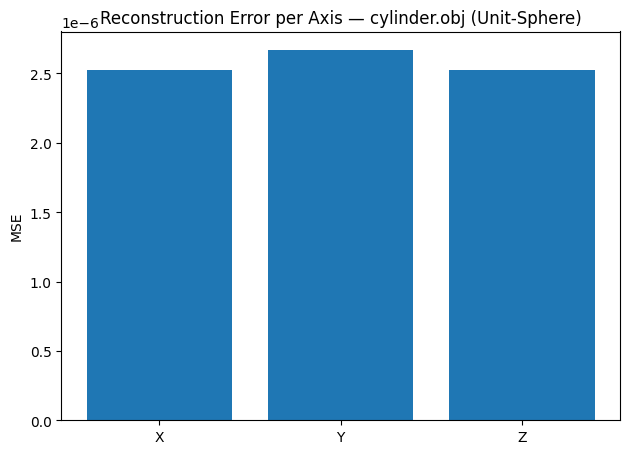


Processing mesh: explosive.obj
 Min–Max → MSE: 0.00000012, MAE: 0.00027523


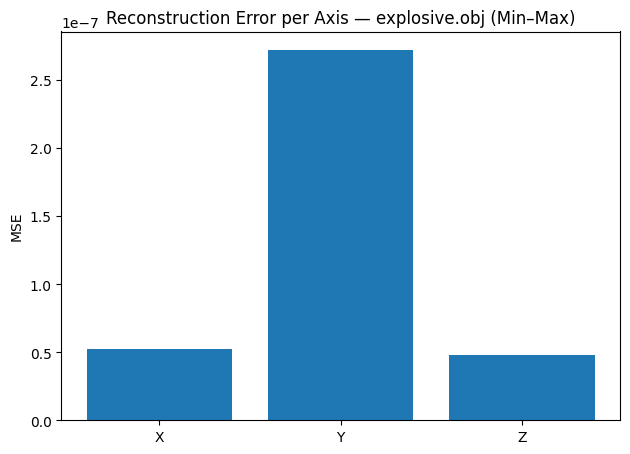

Unit-Sphere → MSE: 0.00000043, MAE: 0.00057430


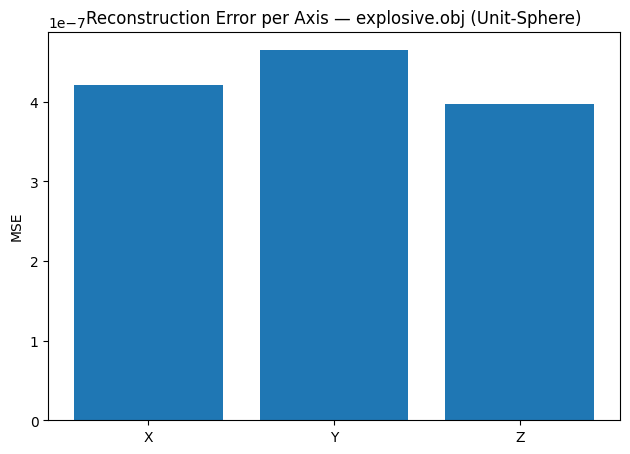


Processing mesh: fence.obj
 Min–Max → MSE: 0.00000016, MAE: 0.00027282


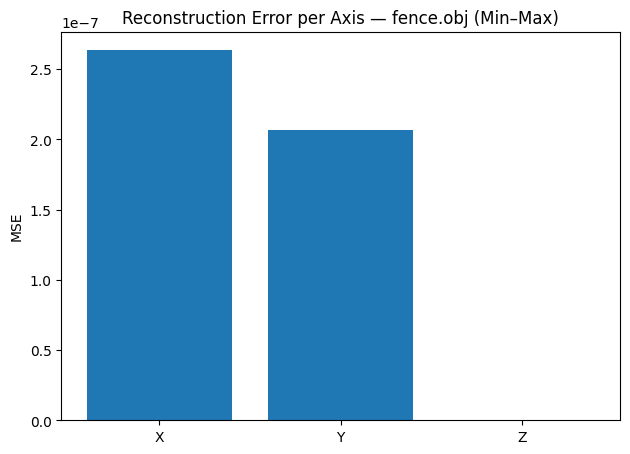

Unit-Sphere → MSE: 0.00000036, MAE: 0.00049395


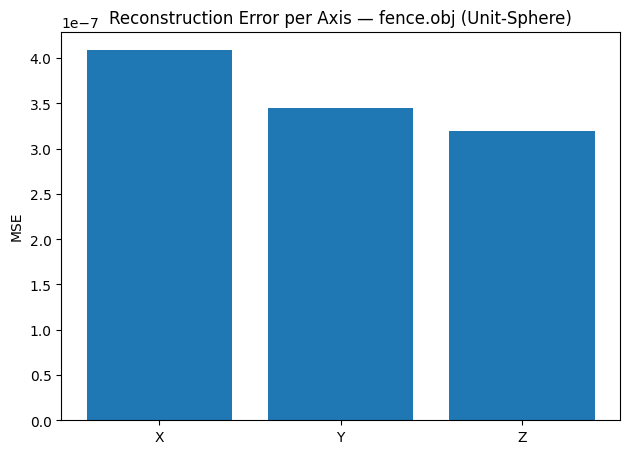


Processing mesh: girl.obj
 Min–Max → MSE: 0.00000021, MAE: 0.00036987


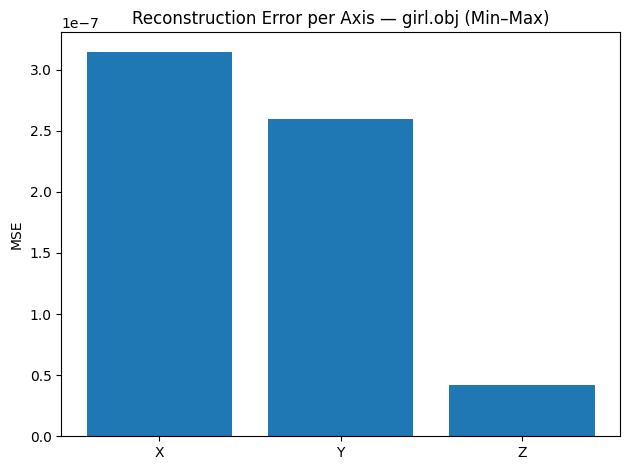

Unit-Sphere → MSE: 0.00000036, MAE: 0.00052223


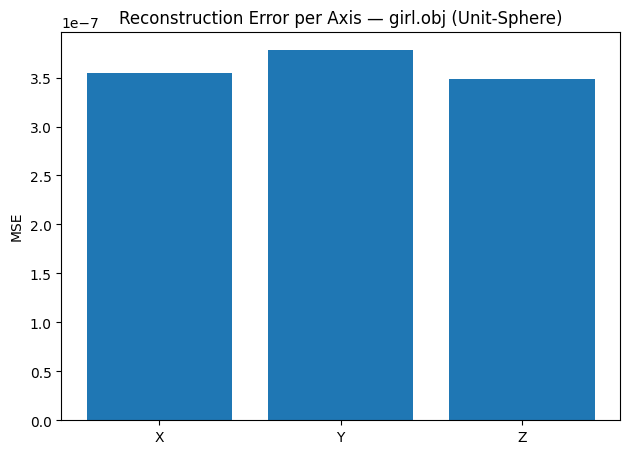


Processing mesh: person.obj
 Min–Max → MSE: 0.00000079, MAE: 0.00069171


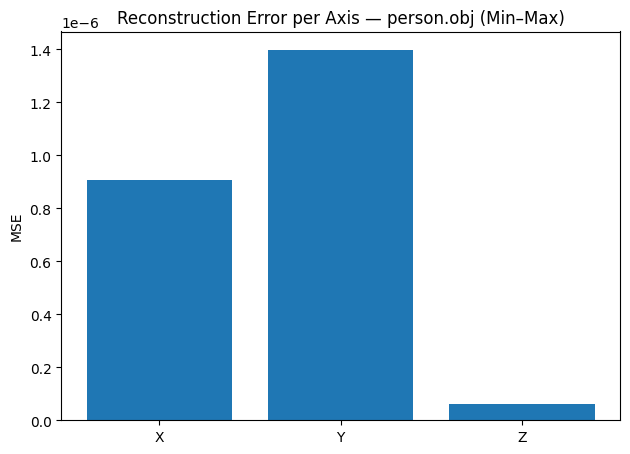

Unit-Sphere → MSE: 0.00000179, MAE: 0.00115379


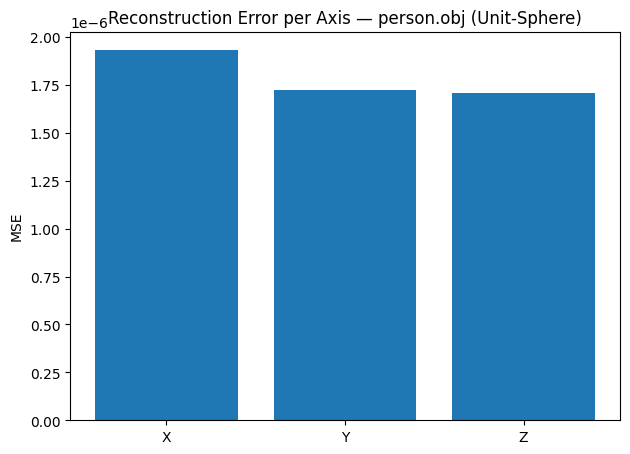


Processing mesh: table.obj
 Min–Max → MSE: 0.00000015, MAE: 0.00030674


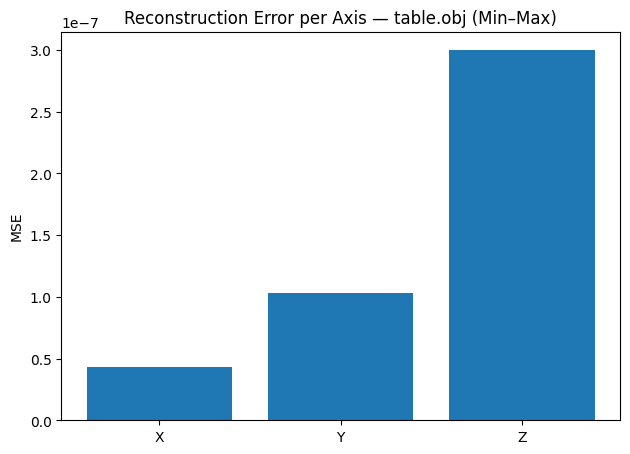

Unit-Sphere → MSE: 0.00000047, MAE: 0.00059892


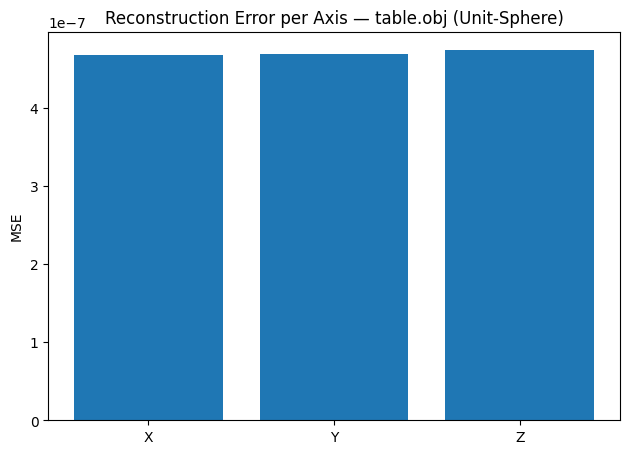


Processing mesh: talwar.obj
 Min–Max → MSE: 0.00000013, MAE: 0.00022840


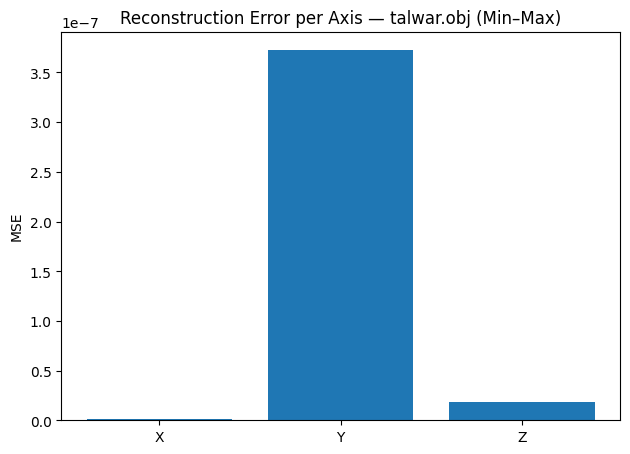

Unit-Sphere → MSE: 0.00000060, MAE: 0.00066850


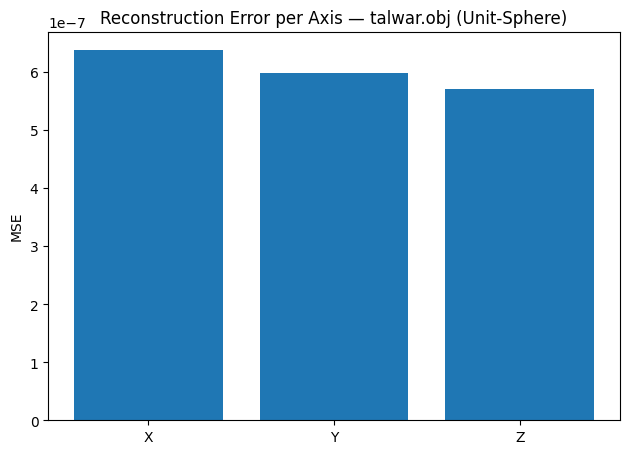


 Task 3 complete! Reconstructed meshes, plots, and CSV saved in 'outputs_task3'


In [27]:
# Step 3: Process each mesh
mesh_files = [f for f in os.listdir(orig_folder) if f.endswith(".obj")]
results = []  # store results

for mesh_file in mesh_files:
    print(f"\nProcessing mesh: {mesh_file}")
    orig_path = os.path.join(orig_folder, mesh_file)
    mesh_orig = trimesh.load_mesh(orig_path, skip_materials=True, process=False)
    orig_vertices = np.array(mesh_orig.vertices)

    v_min = orig_vertices.min(axis=0)
    v_max = orig_vertices.max(axis=0)
    center = orig_vertices.mean(axis=0)
    radius = np.max(np.linalg.norm(orig_vertices - center, axis=1))

    # Min–Max Dequantize + Denormalize

    q_path_minmax = os.path.join(processed_folder, f"{mesh_file[:-4]}_quant_minmax.obj")
    if os.path.exists(q_path_minmax):
        mesh_q = trimesh.load_mesh(q_path_minmax, skip_materials=True, process=False)
        q_vertices = np.array(mesh_q.vertices)

        # Dequantize
        dequant = q_vertices / (bins - 1)

        # Denormalize
        reconstructed = dequant * (v_max - v_min) + v_min

        # Compute error
        mse = mean_squared_error(orig_vertices, reconstructed)
        mae = mean_absolute_error(orig_vertices, reconstructed)

        # Save reconstructed mesh
        mesh_rec = mesh_orig.copy()
        mesh_rec.vertices = reconstructed
        mesh_rec.export(os.path.join(output_folder, f"{mesh_file[:-4]}_reconstructed_minmax.obj"))

        results.append([mesh_file, "Min–Max", mse, mae])
        print(f" Min–Max → MSE: {mse:.8f}, MAE: {mae:.8f}")

        # Plot error per axis
        err_axes = np.mean((orig_vertices - reconstructed) ** 2, axis=0)
        plt.bar(['X', 'Y', 'Z'], err_axes)
        plt.title(f"Reconstruction Error per Axis — {mesh_file} (Min–Max)")
        plt.ylabel("MSE")
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f"{mesh_file[:-4]}_error_minmax.png"))
        plt.show()
        plt.close()

    # Unit-Sphere Dequantize + Denormalize
    q_path_sphere = os.path.join(processed_folder, f"{mesh_file[:-4]}_quant_sphere.obj")
    if os.path.exists(q_path_sphere):
        mesh_q = trimesh.load_mesh(q_path_sphere, skip_materials=True, process=False)
        q_vertices = np.array(mesh_q.vertices)

        # Dequantize (back to [-1, 1])
        dequant = (q_vertices / (bins - 1)) * 2 - 1

        # Denormalize
        reconstructed = (dequant * radius) + center

        # Compute error
        mse = mean_squared_error(orig_vertices, reconstructed)
        mae = mean_absolute_error(orig_vertices, reconstructed)

        # Save reconstructed mesh
        mesh_rec = mesh_orig.copy()
        mesh_rec.vertices = reconstructed
        mesh_rec.export(os.path.join(output_folder, f"{mesh_file[:-4]}_reconstructed_sphere.obj"))

        results.append([mesh_file, "Unit Sphere", mse, mae])
        print(f"Unit-Sphere → MSE: {mse:.8f}, MAE: {mae:.8f}")

        # Plot error per axis
        err_axes = np.mean((orig_vertices - reconstructed) ** 2, axis=0)
        plt.bar(['X', 'Y', 'Z'], err_axes)
        plt.title(f"Reconstruction Error per Axis — {mesh_file} (Unit-Sphere)")
        plt.ylabel("MSE")
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f"{mesh_file[:-4]}_error_sphere.png"))
        plt.show()
        plt.close()

# Step 4: Save summary table
import csv
summary_path = os.path.join(output_folder, "error_summary.csv")
with open(summary_path, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Mesh", "Normalization Method", "MSE", "MAE"])
    writer.writerows(results)

print(f"\n Task 3 complete! Reconstructed meshes, plots, and CSV saved in '{output_folder}'")